In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,  precision_recall_curve, auc
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import roc_curve



In [2]:
df = pd.read_csv("cardio_train.csv",sep=";")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
df.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [5]:
df["age_years"] = (df["age"]/365).astype(int)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61


In [6]:
df['gender'] = df['gender'].replace({1: 0, 2: 1}) 
print(df['gender'].value_counts())

gender
0    45530
1    24470
Name: count, dtype: int64


In [6]:
df2 = df.drop(["age"],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
 12  age_years    70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


<Axes: >

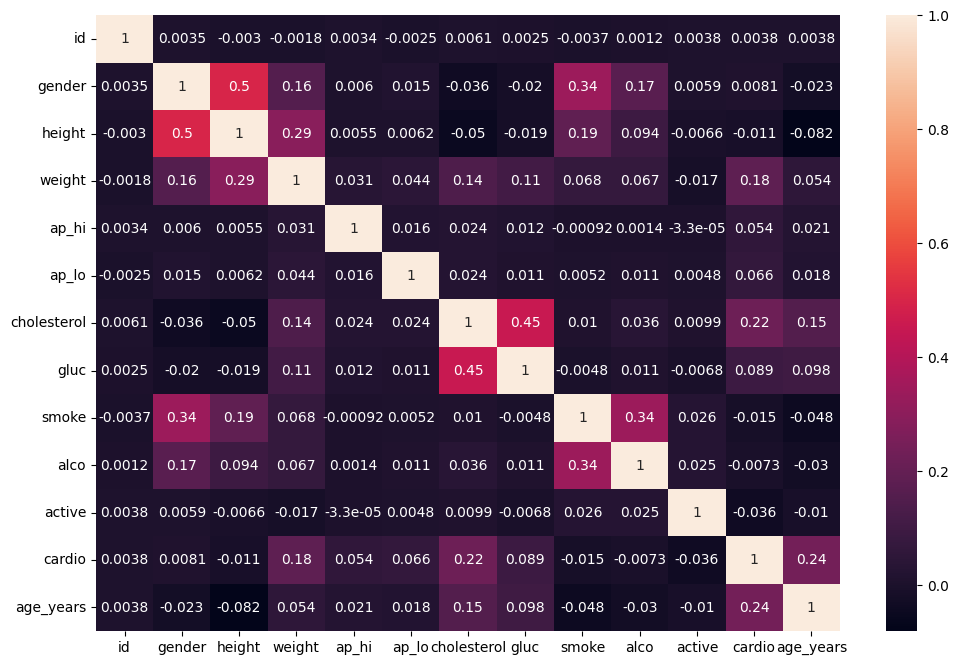

In [8]:
plt.figure(figsize=(12,8))

sns.heatmap(df2.corr(),annot=True)

In [9]:
#Distribucion target

distribucion = df2["cardio"].value_counts()
porcentaje = (df2["cardio"].value_counts()/len(df2))*100

print(distribucion,porcentaje)

cardio
0    35021
1    34979
Name: count, dtype: int64 cardio
0    50.03
1    49.97
Name: count, dtype: float64


In [10]:
df2["ap_lo"].value_counts()
df2["ap_hi"].value_counts()
df2["weight"].value_counts()

df_clean = df2[
    (df2["ap_hi"] >= 40) & (df2["ap_hi"] <= 250) &
    (df2["ap_lo"] >= 40) & (df2["ap_lo"] <= 180) &
    (df2["ap_hi"] >= df2["ap_lo"]) &
    (df2["height"] >= 120) & (df2["height"] <= 220) &  
    (df2["weight"] >= 30) & (df2["weight"] <= 200)
]

df2["height"].min()
df2["height"].max()

indice_max_altura = df2["height"].idxmax()
fila_con_max_altura = df2.loc[indice_max_altura]
print(fila_con_max_altura)



id             9223.0
gender            0.0
height          250.0
weight           86.0
ap_hi           140.0
ap_lo           100.0
cholesterol       3.0
gluc              1.0
smoke             0.0
alco              0.0
active            1.0
cardio            1.0
age_years        58.0
Name: 6486, dtype: float64


In [11]:
df_clean["imc"] = df_clean["weight"] / ((df_clean["height"] / 100) ** 2)
df_clean

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13020\4062764402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["imc"] = df_clean["weight"] / ((df_clean["height"] / 100) ** 2)


,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,imc
0,0,1,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,0,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,2,0,165,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,3,1,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,4,0,156,56.0,100,60,1,1,0,0,0,0,47,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,1,168,76.0,120,80,1,1,1,0,1,0,52,26.927438
69996,99995,0,158,126.0,140,90,2,2,0,0,1,1,61,50.472681
69997,99996,1,183,105.0,180,90,3,1,0,1,0,1,52,31.353579
69998,99998,0,163,72.0,135,80,1,2,0,0,0,1,61,27.099251


In [12]:
df3 =df_clean.drop(["id"],axis=1)

In [13]:
distribucion = df3["cardio"].value_counts()
porcentaje = (df3["cardio"].value_counts()/len(df3))*100

print(distribucion,porcentaje)

cardio
0    34672
1    33945
Name: count, dtype: int64 cardio
0    50.529752
1    49.470248
Name: count, dtype: float64


<Axes: >

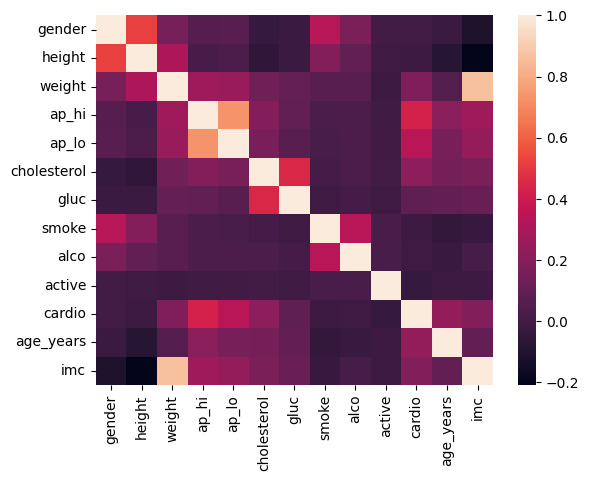

In [14]:
sns.heatmap(df3.corr())

In [15]:
df3.nunique()

gender            2
height           73
weight          274
ap_hi           107
ap_lo            81
cholesterol       3
gluc              3
smoke             2
alco              2
active            2
cardio            2
age_years        28
imc            3729
dtype: int64

In [16]:
df3.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,imc
count,68617.000000,68617.000000,68617.000000,68617.000000,68617.000000,68617.000000,68617.000000,68617.000000,68617.000000,68617.000000,68617.000000,68617.000000,68617.000000
mean,0.348645,164.413382,74.115888,126.673638,81.306834,1.364735,1.225833,0.087967,0.053354,0.803314,0.494702,52.829226,27.457817
std,0.476545,7.912769,14.297126,16.690595,9.445505,0.678936,0.571700,0.283248,0.224740,0.397496,0.499976,6.768989,5.257331
min,0.000000,120.000000,30.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,10.726644
25%,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,0.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,1.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,1.000000,207.000000,200.000000,240.000000,180.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,108.169847


In [17]:
# Entrenar modelo

X = df3.drop("cardio",axis=1)
y = df3["cardio"]

X_train, X_test,  y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train.columns.tolist()

['gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'age_years',
 'imc']

In [18]:
# Logistic regression 

param_grid = {
    "C": [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    "penalty": ["l2","l1"], 
    "solver": ["liblinear"]
}

scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "roc_auc": "roc_auc"
}

logreg = LogisticRegression(max_iter=1000)

grid = GridSearchCV(estimator=logreg,
                    param_grid=param_grid,
                    scoring=scoring,
                    refit="recall", 
                    cv=10,
                    n_jobs=-1,
                    )

grid.fit(X_train_scaled, y_train)

y_pred_logreg = grid.predict(X_test_scaled)
y_prob_logreg = grid.predict_proba(X_test_scaled)[:, 1]

print("Mejores parámetros:", grid.best_params_)
print("Mejor estimador:", grid.best_estimator_)
print("Mejor score:",grid.best_score_)

print("\nMétricas en test:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1 Score:", f1_score(y_test, y_pred_logreg))
print("ROC AUC:", roc_auc_score(y_test, y_prob_logreg))

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_logreg))



Mejores parámetros: {'C': 0.05, 'penalty': 'l2', 'solver': 'liblinear'}
Mejor estimador: LogisticRegression(C=0.05, max_iter=1000, solver='liblinear')
Mejor score: 0.6651179941002949

Métricas en test:
Accuracy: 0.7303264354415622
Precision: 0.7625210084033613
Recall: 0.6647619047619048
F1 Score: 0.710293542074364
ROC AUC: 0.7941619399105991

Matriz de Confusión:
[[5486 1413]
 [2288 4537]]


Text(45.72222222222221, 0.5, 'Realidad')

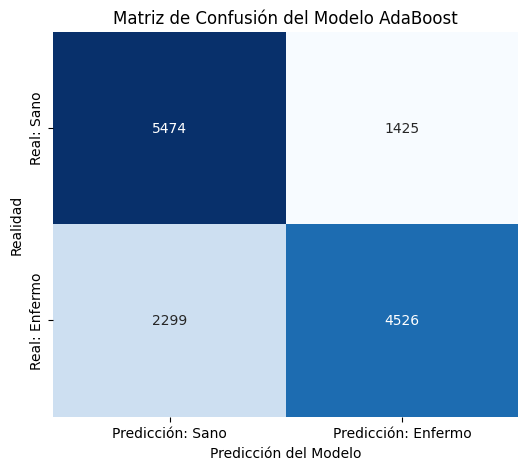

In [35]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicción: Sano", "Predicción: Enfermo"],
            yticklabels=["Real: Sano", "Real: Enfermo"])
plt.title("Matriz de Confusión del Modelo AdaBoost")
plt.xlabel("Predicción del Modelo")
plt.ylabel("Realidad")

Text(0, 0.5, 'Tasa de Verdaderos Positivos.')

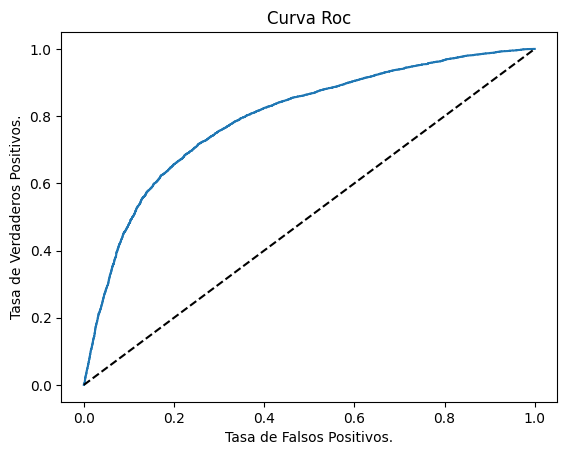

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_logreg)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], "k--")
plt.title('Curva Roc')
plt.xlabel("Tasa de Falsos Positivos.")
plt.ylabel("Tasa de Verdaderos Positivos.")

In [19]:

parameters = {
    "n_estimators": [50, 75, 100, 125,200,300],
    "max_features": [1, 2, 3,4,5],
    "max_depth":[30, 40, 50, None],
    "min_samples_split":[8, 10, 12, 15],
    "min_samples_leaf":[1, 2, 3,4,5],
    "criterion": ["gini", "entropy"],
   
}

rfc = RandomForestClassifier(random_state=42)

scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "roc_auc": "roc_auc"
}

random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=parameters,
                                   n_iter=50,  
                                   scoring=scoring,
                                   refit="recall", 
                                   cv=5,
                                   random_state=42, 
                                   n_jobs=-1, 
                                   verbose=2) 

print("Iniciando entrenamiento con RandomizedSearchCV")
random_search.fit(X_train_scaled, y_train)
print("Entrenamiento completado.")

best_model_rf = random_search.best_estimator_
y_pred_rf = best_model_rf.predict(X_test_scaled)
y_prob_rf = best_model_rf.predict_proba(X_test_scaled)[:, 1]

print("\nMejores parámetros encontrados por RandomizedSearchCV:", random_search.best_params_)

print(f"Mejor Recall (CV) del modelo: {random_search.best_score_:.4f}")

print("\nMétricas en el conjunto de prueba (Test Set):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_rf):.4f}")

print("\nMatriz de Confusión en el conjunto de prueba:")
print(confusion_matrix(y_test, y_pred_rf))

Iniciando entrenamiento con RandomizedSearchCV
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Entrenamiento completado.

Mejores parámetros encontrados por RandomizedSearchCV: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 1, 'max_depth': 30, 'criterion': 'gini'}
Mejor Recall (CV) del modelo: 0.7047

Métricas en el conjunto de prueba (Test Set):
Accuracy: 0.7279
Precision: 0.7391
Recall: 0.7001
F1 Score: 0.7190
ROC AUC: 0.7895

Matriz de Confusión en el conjunto de prueba:
[[5212 1687]
 [2047 4778]]


In [20]:
best_model_rf.feature_importances_


array([0.00634983, 0.10173046, 0.1202408 , 0.23692394, 0.14094474,
       0.05952319, 0.01636272, 0.00464475, 0.00456356, 0.00805374,
       0.15206453, 0.14859772])

Text(45.72222222222221, 0.5, 'Realidad')

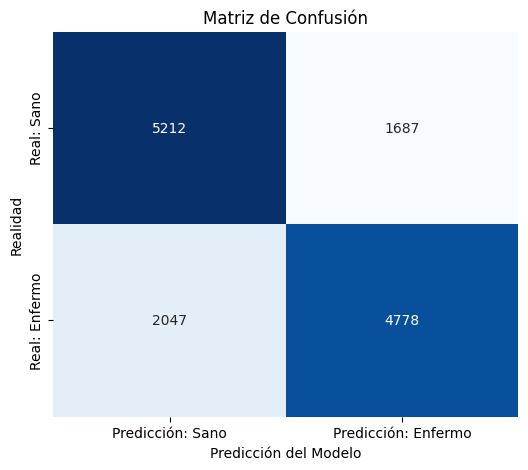

In [63]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicción: Sano", "Predicción: Enfermo"],
            yticklabels=["Real: Sano", "Real: Enfermo"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción del Modelo")
plt.ylabel("Realidad")

Text(0, 0.5, 'True Positive Rate')

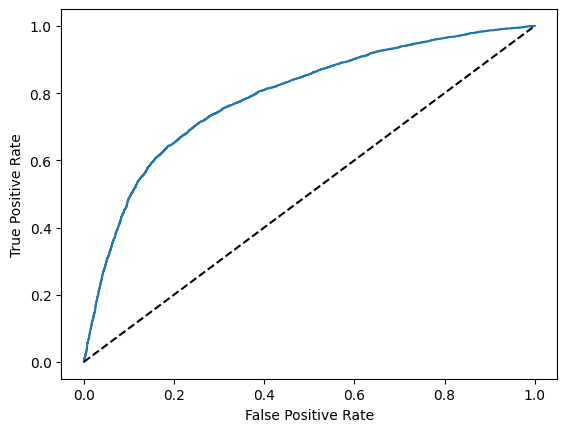

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [23]:
import pickle

model_filename = "cardio_model.pkl"

# Guarda el modelo
with open(model_filename, "wb") as file:
    pickle.dump(best_model_rf, file)

scaler_filename = "scaler.pkl"

with open(scaler_filename, "wb") as file:
    pickle.dump(scaler, file)

In [21]:

xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

param_distributions = {
    "n_estimators": [100, 200,50,300,400],
    "max_depth": [3, 5, 7, 9, 11, 13],
    "learning_rate": [0.005, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    "subsample": [0.8, 1.0],
    "gamma": [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    "lambda": [0.5, 1, 1.5, 2], 
    "alpha": [0, 0.1, 0.5, 1] 
}

scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",       
    "f1": "f1",
    "roc_auc": "roc_auc"
}

random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_distributions,
    n_iter=50,
    scoring=scoring,
    refit="recall", 
    cv=10,
    random_state=42, 
    verbose=2,       
    n_jobs=-1        
)

# Entrenar con RandomizedSearchCV
print(f"Iniciando entrenamiento con RandomizedSearchCV para XGBoost (n_iter={50})...")
print(f"Número total de fits a realizar: {50 * 10}") 
random_search_xgb.fit(X_train_scaled, y_train)
print("Entrenamiento completado.")

# Predecir con el mejor modelo encontrado
best_model_xgb = random_search_xgb.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test_scaled)
y_prob_xgb = best_model_xgb.predict_proba(X_test_scaled)[:, 1]

# Mostrar mejores hiperparámetros
print("\nMejores parámetros encontrados por RandomizedSearchCV (XGBoost):")
print(random_search_xgb.best_params_)

# Mostrar el mejor score de recall en CV
print(f"Mejor Recall (CV) del modelo (XGBoost): {random_search_xgb.best_score_:.4f}")

# Métricas finales en test
print("\nMétricas en el conjunto de prueba (Test Set) para XGBoost:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_xgb):.4f}")

# Matriz de confusión
print("\nMatriz de Confusión para XGBoost:")
print(confusion_matrix(y_test, y_pred_xgb))


Iniciando entrenamiento con RandomizedSearchCV para XGBoost (n_iter=50)...
Número total de fits a realizar: 500
Fitting 10 folds for each of 50 candidates, totalling 500 fits


c:\Users\Usuario\miniconda3\envs\data_analysis_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:21:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Entrenamiento completado.

Mejores parámetros encontrados por RandomizedSearchCV (XGBoost):
{'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2, 'lambda': 0.5, 'gamma': 0.4, 'alpha': 0.1}
Mejor Recall (CV) del modelo (XGBoost): 0.6906

Métricas en el conjunto de prueba (Test Set) para XGBoost:
Accuracy: 0.7386
Precision: 0.7633
Recall: 0.6875
F1 Score: 0.7234
ROC AUC: 0.8027

Matriz de Confusión para XGBoost:
[[5444 1455]
 [2133 4692]]


Text(0, 0.5, 'True Positive Rate')

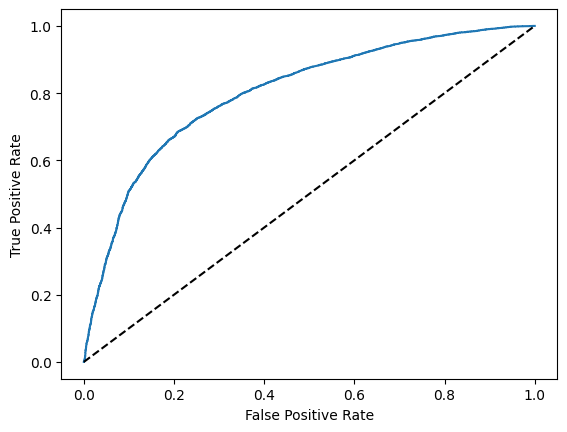

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [31]:
best_model_xgb.feature_importances_

array([0.02312212, 0.01463876, 0.01854659, 0.49158442, 0.03693002,
       0.18227111, 0.03339382, 0.03087806, 0.01798432, 0.0387872 ,
       0.08866668, 0.02319684], dtype=float32)

In [38]:
from sklearn.tree import DecisionTreeClassifier 

adaboost_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42, max_depth=1), random_state=42)


param_distributions_ada = {
    "n_estimators": [50,100,200,300,400],
    "learning_rate": [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 1.0],
    "estimator__max_depth": [ 5,6,7] 
}

scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "roc_auc": "roc_auc"
}
n_iterations_ada = 75 
cv_folds_ada = 5      

random_search_ada = RandomizedSearchCV(
    estimator=adaboost_model,
    param_distributions=param_distributions_ada,
    n_iter=n_iterations_ada,
    scoring=scoring,
    refit="recall",
    cv=cv_folds_ada,
    random_state=42,
    verbose=2,
    n_jobs=-1
)

# Entrenar con RandomizedSearchCV
print(f"\nIniciando entrenamiento con RandomizedSearchCV para AdaBoost (n_iter={n_iterations_ada}, cv={cv_folds_ada})...")
print(f"Número total de fits a realizar: {n_iterations_ada * cv_folds_ada}")
random_search_ada.fit(X_train_scaled, y_train)
print("Entrenamiento completado para AdaBoost.")

# Predecir con el mejor modelo encontrado
best_model_ada = random_search_ada.best_estimator_
y_pred_ada = best_model_ada.predict(X_test_scaled)
y_prob_ada = best_model_ada.predict_proba(X_test_scaled)[:, 1]

# Mostrar mejores hiperparámetros
print("\nMejores parámetros encontrados por RandomizedSearchCV (AdaBoost):")
print(random_search_ada.best_params_)

# Mostrar el mejor score de recall en CV
print(f"Mejor Recall (CV) del modelo (AdaBoost): {random_search_ada.best_score_:.4f}")

# Métricas finales en test
print("\nMétricas en el conjunto de prueba (Test Set) para AdaBoost:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ada):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_ada):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_ada):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_ada):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_ada):.4f}")

# Matriz de confusión
print("\nMatriz de Confusión para AdaBoost:")
print(confusion_matrix(y_test, y_pred_ada))




Iniciando entrenamiento con RandomizedSearchCV para AdaBoost (n_iter=75, cv=5)...
Número total de fits a realizar: 375
Fitting 5 folds for each of 75 candidates, totalling 375 fits
Entrenamiento completado para AdaBoost.

Mejores parámetros encontrados por RandomizedSearchCV (AdaBoost):
{'n_estimators': 400, 'learning_rate': 0.5, 'estimator__max_depth': 6}
Mejor Recall (CV) del modelo (AdaBoost): 0.6923

Métricas en el conjunto de prueba (Test Set) para AdaBoost:
Accuracy: 0.7325
Precision: 0.7540
Recall: 0.6859
F1 Score: 0.7183
ROC AUC: 0.7983

Matriz de Confusión para AdaBoost:
[[5372 1527]
 [2144 4681]]


Text(45.72222222222221, 0.5, 'Realidad')

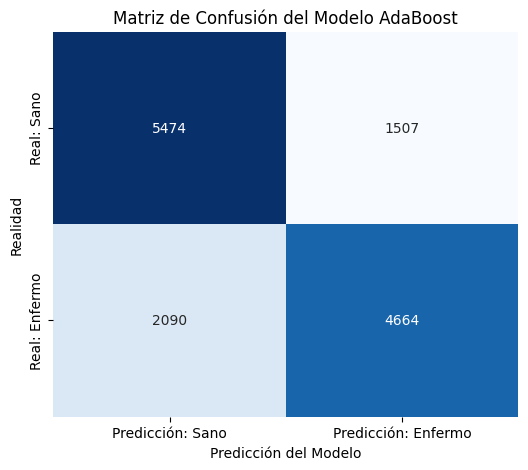

In [ ]:
# --Matriz de Confusión:--

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_ada), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicción: Sano", "Predicción: Enfermo"],
            yticklabels=["Real: Sano", "Real: Enfermo"])
plt.title("Matriz de Confusión del Modelo AdaBoost")
plt.xlabel("Predicción del Modelo")
plt.ylabel("Realidad")


Text(0, 0.5, 'Tasa de Verdaderos Positivos.')

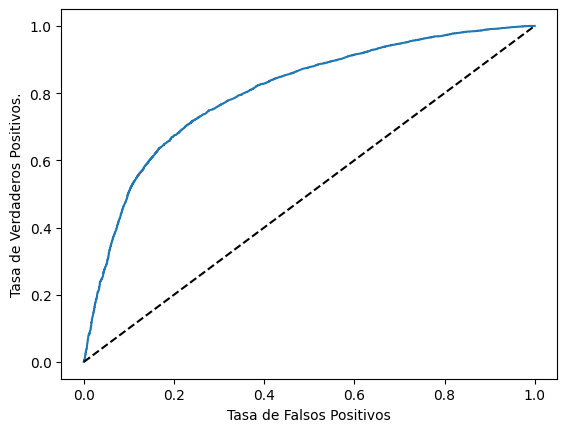

In [55]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_ada)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], "k--")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos.")